In [57]:
%matplotlib inline

In [58]:
import matplotlib.pyplot as plt

In [33]:
import os
import numpy as np
import h5py
import nbodykit.lab as nlab

In [18]:
ifile = '/Users/ding/Documents/playground/WiggleNowiggle/1test_data/normal-fof00100_0.6452_0.168.hdf5'
f = h5py.File(ifile, 'r')

In [26]:
# List all groups
print("Keys: %s" % f.keys())
group = list(f.keys())
print(group)

Keys: KeysView(<HDF5 file "normal-fof00100_0.6452_0.168.hdf5" (mode r)>)
['FOFGroups']


In [27]:
dset = f[group[0]][:]
print(dset, dset.dtype)

[ ([  9.99988258e-01,   9.99988377e-01,   6.48897898e-04], [ -1.44284144e-07,   1.25406046e-07,   1.43052944e-07],     0)
 ([  2.58767426e-01,   3.38956803e-01,   7.74578005e-02], [ -4.20922972e-03,  -4.52705048e-04,   5.28158911e-04], 64700)
 ([  1.80212960e-01,   1.37286350e-01,   6.39832854e-01], [  1.25438161e-03,  -7.21376273e-04,  -3.95847077e-04], 63277)
 ...,
 ([  5.03986776e-01,   2.72752553e-01,   9.67745930e-02], [  4.05300641e-03,  -1.11695495e-03,   4.07119654e-03],    33)
 ([  5.07516824e-02,   3.13175380e-01,   3.72966170e-01], [ -2.91355164e-03,   1.18933572e-03,  -2.79745017e-03],    33)
 ([  3.60247374e-01,   2.44766977e-02,   1.90057501e-01], [  9.23227984e-04,   7.36368471e-04,   4.00221488e-03],    33)] [('Position', '<f4', (3,)), ('Velocity', '<f4', (3,)), ('Length', '<i4')]


In [72]:
print(f[group[0]].attrs['BoxSize'].shape)

(3,)


In [74]:
x_y_z = dset['Position']*f[group[0]].attrs['BoxSize']
print(x_y_z)

[[  1.37998380e+03   1.37998396e+03   8.95479099e-01]
 [  3.57099048e+02   4.67760388e+02   1.06891765e+02]
 [  2.48693884e+02   1.89455163e+02   8.82969339e+02]
 ..., 
 [  6.95501751e+02   3.76398523e+02   1.33548938e+02]
 [  7.00373217e+01   4.32182025e+02   5.14693315e+02]
 [  4.97141376e+02   3.37778428e+01   2.62279352e+02]]


In [75]:
v_xyz = dset['Velocity']*f[group[0]].attrs['BoxSize']
print(v_xyz.shape)

(12696653, 3)


In [76]:
x_v = np.hstack((x_y_z, v_xyz))
print(x_v.dtype)

float64


In [77]:
print(dset.dump)

<built-in method dump of numpy.ndarray object at 0x1107d50d0>


In [78]:
x_v_cat = nlab.ArrayCatalog(dset)

In [79]:
print(x_v_cat.columns)

['Length', 'Position', 'Selection', 'Velocity', 'Weight']


In [80]:
r = nlab.FFTPower(x_v_cat, mode='1d', BoxSize=1380., Nmesh=128)

In [81]:
#r = nlab.FFTPower(dset, mode='1d', BoxSize=1380., Nmesh=128)

AttributeError: 'numpy.ndarray' object has no attribute 'comm'

In [82]:
r.power

<DataSet: dims: (k: 64), variables: ('k', 'power', 'modes')>

In [83]:
r.power['k']

array([ 0.        ,  0.00644902,  0.01115458,  0.01561628,  0.02017146,
        0.02492702,  0.02959412,  0.03402964,  0.03848839,  0.04309683,
        0.04770974,  0.05220016,  0.05676944,  0.06145674,  0.06598348,
        0.07045739,  0.07503438,  0.07957931,  0.08415473,  0.08871564,
        0.09324763,  0.09780306,  0.10234642,  0.10691264,  0.11144127,
        0.11599882,  0.12061477,  0.12519467,  0.12971907,  0.13424624,
        0.1387587 ,  0.14332536,  0.14789404,  0.15247116,  0.15705065,
        0.16158943,  0.16613519,  0.17067724,  0.17522835,  0.17977761,
        0.18431173,  0.18886541,  0.19342445,  0.19800479,  0.202579  ,
        0.20713416,  0.21166358,  0.21619375,  0.22077055,  0.22532619,
        0.22987954,  0.23444724,  0.23900943,  0.24357905,  0.24810361,
        0.25264894,  0.25720737,  0.26173761,  0.26629377,  0.27084813,
        0.27541488,  0.27997044,  0.28451892,  0.28909183])

/Users/ding/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


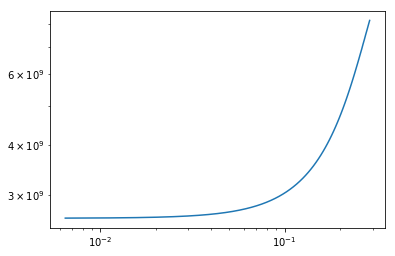

In [84]:
plt.loglog(r.power['k'], r.power['power'])